In [1]:
import sys
sys.path.append("/cnvrg")

In [19]:
# code that saves a short version of the results for analysis. 
# Sort the images by a value: sort_by_key and save the (value, path) pairs to a txt file.
import yaml

sort_by_key = "class_1_iou"
results_yaml_path = "/cnvrg/output/mhp_modanet_imaterialist_eval/_results.yaml"
outfile = "/cnvrg/output/mhp_modanet_imaterialist_eval/images_sorted_by_%s.txt" % sort_by_key

data = yaml.load(open(results_yaml_path, "r")) 
sorted_images = sorted([(v[sort_by_key], v["path"]) for k, v in data.items()]) 
with open(outfile, "w") as f: 
    f.writelines(["%.4f, %s\n" % (val, image_path) for val, image_path in sorted_images]) 

NameError: name 'yaml' is not defined

In [3]:
with open("/cnvrg/output/mhp_modanet_imaterialist_eval/images_sorted_by_class_1_iou.txt", "r") as f:
    iou_paths = [tuple(l.strip().split(", ")) for l in f.readlines()]
    iou_paths = [(float(val_path_pair[0]), val_path_pair[1]) for val_path_pair in iou_paths]
    

In [8]:
import matplotlib.pyplot as plt
import numpy as np

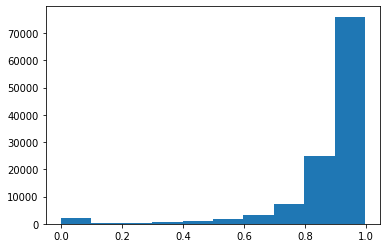

In [10]:
iou_vals = np.asarray([iou for iou, _ in iou_paths])
plt.hist(iou_vals)
plt.show()

In [27]:
def how_many_below(iou_vals, t):
    num_below = np.sum(iou_vals<t)
    print("There are %d images below %.2f that are %.2f%% of the dataset." % (num_below, t, 100*num_below/len(iou_vals)))


In [28]:
how_many_below(iou_vals, 0.9)
how_many_below(iou_vals, 0.8)
how_many_below(iou_vals, 0.7)
how_many_below(iou_vals, 0.6)
how_many_below(iou_vals, 0.5)

There are 43272 images below 0.90 that are 36.73% of the dataset.
There are 17084 images below 0.80 that are 14.50% of the dataset.
There are 9582 images below 0.70 that are 8.13% of the dataset.
There are 6192 images below 0.60 that are 5.26% of the dataset.
There are 4507 images below 0.50 that are 3.83% of the dataset.


In [55]:
from visualizer.visualize import vis_segmentation 
import cv2, os
all_masks_path = "/data/mhp_modanet_imaterialist/masks"
output_dir = "/cnvrg/output/mhp_modanet_imaterialist_eval/top_100_worst"
output_images_dir = "/cnvrg/output/mhp_modanet_imaterialist_eval/top_100_worst_dataset/images"
output_masks_dir = "/cnvrg/output/mhp_modanet_imaterialist_eval/top_100_worst_dataset/masks"
os.makedirs(output_dir, exist_ok=True)
os.makedirs(output_images_dir, exist_ok=True)
os.makedirs(output_masks_dir, exist_ok=True)

In [56]:
for i in range(100):
    val, image_path = iou_paths[i]
    basename = os.path.splitext(os.path.basename(image_path))[0]
    mask_path = os.path.join(all_masks_path, basename + ".png")
    
    image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    mask = cv2.cvtColor(cv2.imread(mask_path), cv2.COLOR_BGR2GRAY)
    vis_segmentation(image,
                     seg_map=mask,
                     filename=os.path.join(output_dir, basename + ".png"),
                     label_names=["background", "clothes"],
                     show_plot=False,
                     max_image_dim=1024,
                     background_class=True,
                     title="iou: %.4f" % val)
    cv2.imwrite(os.path.join(output_images_dir, basename + ".png"), cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
    cv2.imwrite(os.path.join(output_masks_dir, basename + ".png"), mask)
    
    